# Bobcat Population Analysis

In [25]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg
from numpy import random as rd

# Base variables and functions
identity_matrix = np.identity(16)
default_t0_population = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
default_number_of_years = 32

## Base Model

    Population  Year
0   160.000000     0
1   233.200000     1
2   229.780000     2
3   196.577680     3
4   173.715059     4
5   154.711636     5
6   136.761632     6
7   120.824721     7
8   106.905764     8
9    94.615734     9
10   83.736099    10
11   74.112109    11
12   65.597032    12
13   58.068548    13
14   51.418291    14
15   45.539210    15
16   40.337343    16
17   35.727043    17
18   31.640480    18
19   28.020880    19
20   24.815916    20
21   21.977539    21
22   19.463702    22
23   17.237403    23
24   15.265763    24
25   13.519638    25
26   11.973233    26
27   10.603708    27
28    9.390834    28
29    8.316691    29
30    7.365413    30
31    6.522944    31
32    5.776838    32


[Text(0.5, 1.0, 'Wild Bobcat Population')]

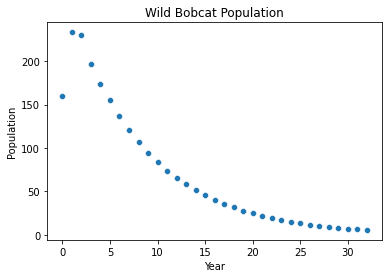

In [26]:
default_leslie_matrix = np.array([[0.32, 0.32, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.15, 1.15, 1.15, 1.15],
                         [0.38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0]])

def growth(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years):
    nth_population = np.zeros(number_of_years+1)
    nth_population[0] = np.sum(t0_population)
    nth_year = np.arange(number_of_years+1)
    for i in nth_year[1:number_of_years+1]:
        nth_population[i] =  np.sum(linalg.matrix_power(leslie_matrix, i).dot(t0_population))

    df = pd.DataFrame({
        'Population' : nth_population,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_ex_situ = growth()

sns.scatterplot(data = data_nth_population_ex_situ, x = "Year", y = "Population").set(title = "Wild Bobcat Population")

## In-situ Model

       Population  Year
0      160.000000     0
1      283.400000     1
2      364.551000     2
3      436.625020     3
4      533.537755     4
5      659.378462     5
6      816.476326     6
7     1011.801542     7
8     1254.810158     8
9     1556.937354     9
10    1932.309667    10
11    2398.526699    11
12    2977.476937    12
13    3696.349631    13
14    4588.910176    14
15    5697.086946    15
16    7072.962384    16
17    8780.820087    17
18   10900.820052    18
19   13532.641624    19
20   16799.935634    20
21   20856.107525    21
22   25891.603462    22
23   32142.871022    23
24   39903.448538    24
25   49537.743797    25
26   61498.146761    26
27   76346.272961    27
28   94779.334716    28
29  117662.879458    29
30  146071.432573    30
31  181338.953086    31
32  225121.471343    32


[Text(0.5, 1.0, 'In-Situ Bobcat Population')]

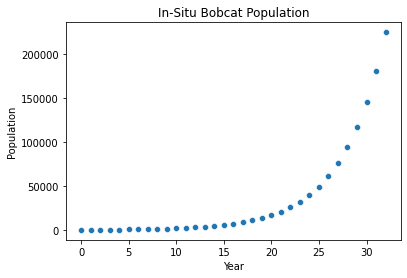

In [27]:
leslie_matrix_extended = np.array([[0.63, 0.63, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
                         [0.34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0]])

data_nth_population_in_situ = growth(leslie_matrix = leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_in_situ, x = "Year", y = "Population").set(title = "In-Situ Bobcat Population")

## Extended Model

    Population  Year
0   160.000000     0
1   233.200000     1
2   229.780000     2
3   196.577680     3
4   173.715059     4
5    67.854106     5
6    59.405814     6
7    52.443905     7
8    46.493403     8
9    41.162853     9
10   15.846806    10
11   14.029944    11
12   12.418947    12
13   10.999544    13
14    9.749000    14
15    3.763557    15
16    3.333677    16
17    2.948151    17
18    2.610520    18
19    2.313276    19
20    0.892437    20
21    0.789728    21
22    0.699587    22
23    0.619654    23
24    0.548736    24
25    0.211593    25
26    0.187402    26
27    0.165964    27
28    0.146980    28
29    0.130169    29
30    0.050195    30
31    0.044454    31
32    0.039369    32


[Text(0.5, 1.0, 'In-Situ Bobcat Population')]

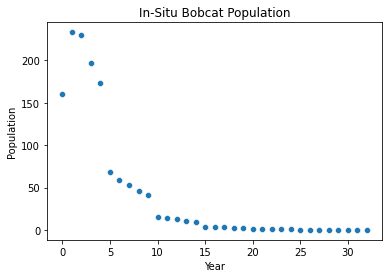

In [31]:
default_catastrophie_matrix = np.identity(16)
for i in range(0,16):
    default_catastrophie_matrix[i][i] = 0.2

def growth_extended(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years, catastrophie_matrix = default_catastrophie_matrix):
    nth_population_extended = np.zeros(number_of_years+1)
    nth_population_extended[0] = np.sum(t0_population)
    current_population = t0_population
    nth_year = np.arange(number_of_years+1)
    for i in range(1, number_of_years+1):
        if (i % 5 == 0):
            nth_population_extended[i] = np.sum(leslie_matrix.dot(current_population) - catastrophie_matrix.dot(current_population))
            current_population = leslie_matrix.dot(current_population) - catastrophie_matrix.dot(current_population)
        else:
            nth_population_extended[i] = np.sum(leslie_matrix.dot(current_population))
            current_population = leslie_matrix.dot(current_population)


    df = pd.DataFrame({
        'Population' : nth_population_extended,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_extended_ex_situ = growth_extended()

sns.scatterplot(data = data_nth_population_extended_ex_situ, x = "Year", y = "Population").set(title = "In-Situ Bobcat Population")

      Population  Year
0     160.000000     0
1     283.400000     1
2     364.551000     2
3     436.625020     3
4     533.537755     4
5     392.609584     5
6     486.787095     6
7     603.563379     7
8     748.909387     8
9     929.532275     9
10    689.074853    10
11    855.451371    11
12   1062.027654    12
13   1318.504370    13
14   1636.929779    14
15   1213.799288    15
16   1506.970894    16
17   1870.577948    17
18   2322.175841    18
19   2882.906313    19
20   2137.532570    20
21   2653.589923    21
22   3294.272304    22
23   4089.647670    23
24   5077.053901    24
25   3764.331293    25
26   4673.192558    26
27   5801.489464    27
28   7202.202419    28
29   8941.103788    29
30   6629.293993    30
31   8229.872172    31
32  10216.894250    32


[Text(0.5, 1.0, 'In-Situ Bobcat Population')]

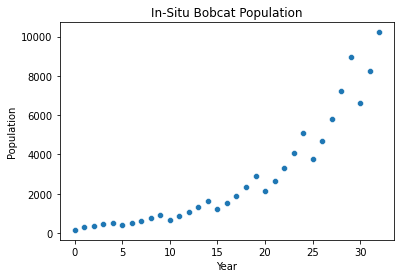

In [32]:
data_nth_population_extended_in_situ = growth_extended(leslie_matrix=leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended_in_situ, x = "Year", y = "Population").set(title = "In-Situ Bobcat Population")